In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium

from yellow import plots
import yellow.trajectories as traj
from yellow import trips as yt

In [2]:
trips = pd.read_csv('~/saida.csv')
cities = pd.read_csv('~/cities.csv')
stats = pd.read_csv('~/traj-stats.csv')
trips = trips.merge(cities[cities.city == 'São Paulo'], on='tripid').merge(stats, on='tripid')

### Just 1 GPS reading ('takes')

In [3]:
one_take = trips[trips.num_takes == 1]
print(len(one_take), 'trips')

33882 trips


Where do they occur?
* Too many trips, let's use matplotlib!

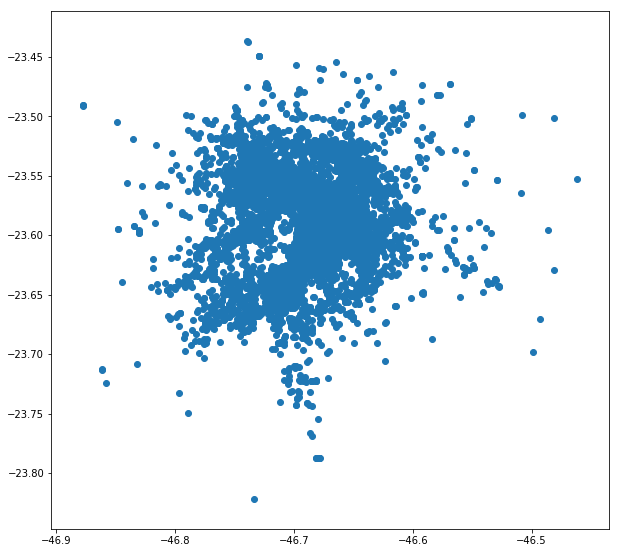

In [4]:
trajectories = traj.process_trajectories(one_take)
fig, ax = plt.subplots(figsize=(10, 10))
trajectories.plot(ax=ax)
plt.show()

When?

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicit

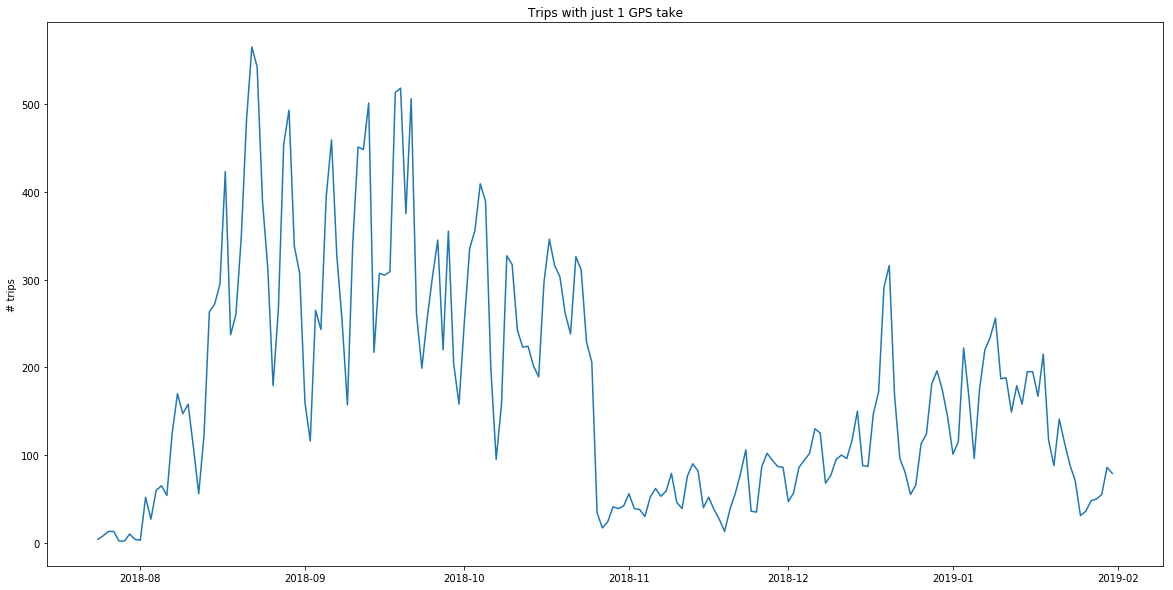

In [5]:
one_take['start_time'] = yt.extract_start_times(one_take)
one_take['day'] = one_take.start_time.dt.to_period('d').dt.to_timestamp()
trips_per_day = one_take.groupby('day', as_index=False).agg({'tripid': 'count'})
plt.figure(figsize=(20, 10))
plt.title('Trips with just 1 GPS take')
plt.ylabel('# trips')
plt.plot(trips_per_day.day, trips_per_day.tripid)
plt.show()

## Just 2 GPS takes

In [6]:
two_takes = trips[trips.num_takes == 2]
print(len(two_takes), 'trips')

31626 trips


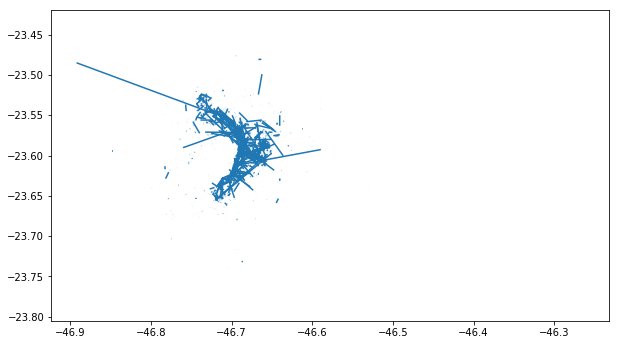

In [7]:
trajectories = traj.process_trajectories(two_takes)
fig, ax = plt.subplots(figsize=(10, 10))
trajectories.plot(ax=ax)
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


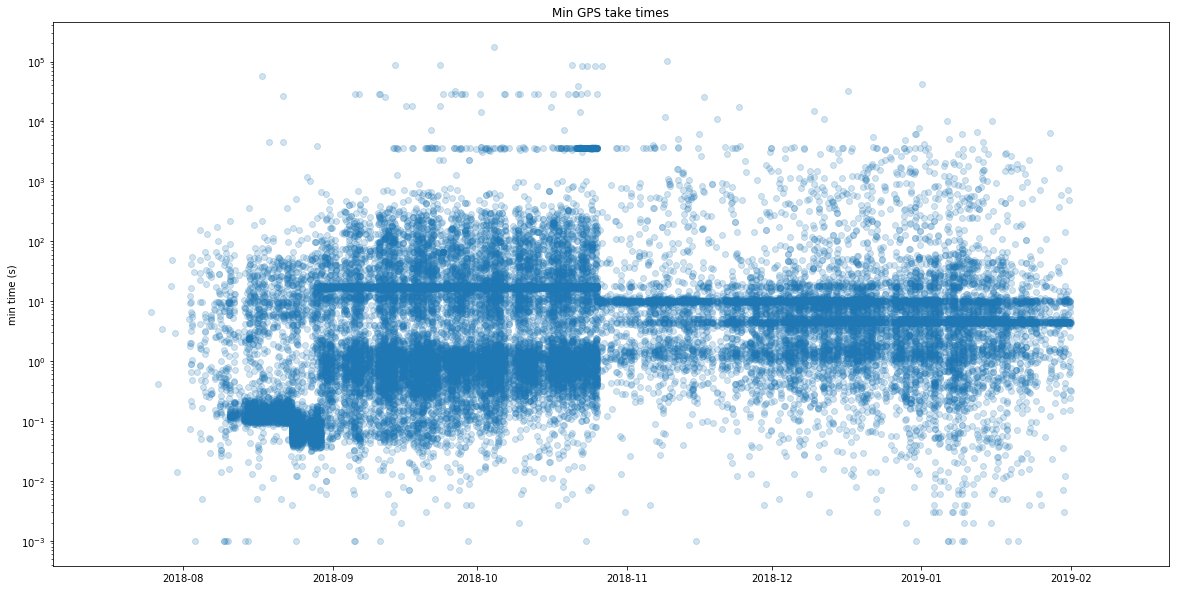

In [8]:
two_takes['start_time'] = yt.extract_start_times(two_takes)
plt.figure(figsize=(20, 10))
plt.yscale('log')
plots.time_scatter(two_takes.take_time_min, 'Min GPS take times', 'min time (s)', two_takes.start_time)
plt.show()

Distances and durations

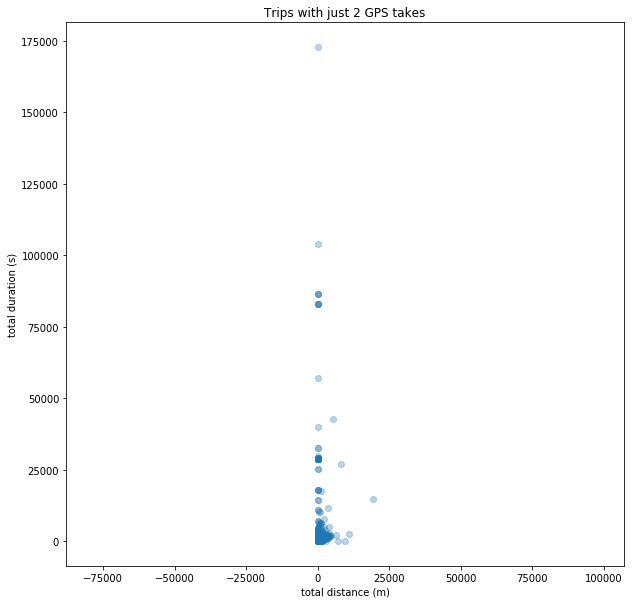

In [9]:
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Trips with just 2 GPS takes')
plt.xlabel('total distance (m)')
plt.ylabel('total duration (s)')
plt.scatter(two_takes.total_distance, two_takes.total_duration, alpha=0.3)
plt.show()

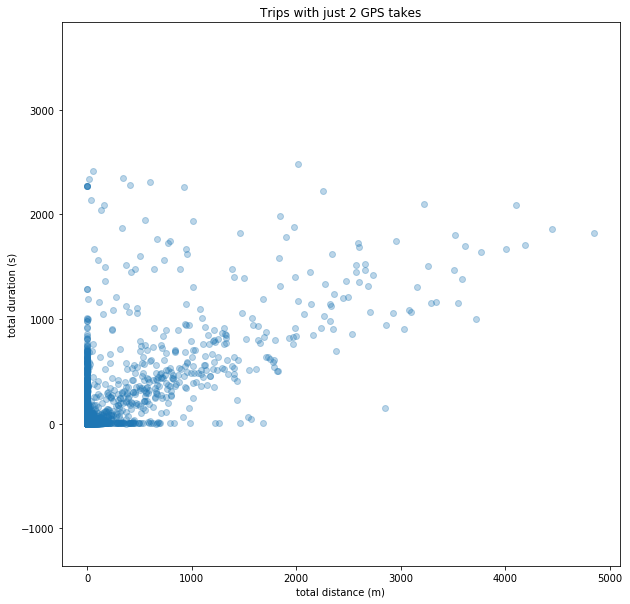

In [10]:
selected = two_takes[(two_takes.total_distance < 5000) & (two_takes.total_duration < 2500)]
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Trips with just 2 GPS takes')
plt.xlabel('total distance (m)')
plt.ylabel('total duration (s)')
plt.scatter(selected.total_distance, selected.total_duration, alpha=0.3)
plt.show()

### Min GPS take time

Distribution

In [11]:
times_in_minutes = trips.take_time_min//60
times_in_minutes.value_counts().head(20)

0.0     321670
1.0        931
2.0        405
3.0        233
4.0        146
60.0       140
5.0        103
6.0         46
59.0        46
7.0         44
8.0         43
9.0         34
11.0        28
10.0        25
61.0        23
58.0        19
12.0        18
13.0        18
15.0        15
14.0        13
Name: take_time_min, dtype: int64

* There is a significative number of trips with a few minutes between takes
  * And with 1 hour!
* Small min take times are the standard, lets take a look at them

Min GPS take time


count    324232.000000
mean         14.615924
std         629.310533
min           0.001000
25%           0.457000
50%           1.775000
75%           4.470000
max      172799.577000
Name: take_time_min, dtype: float64

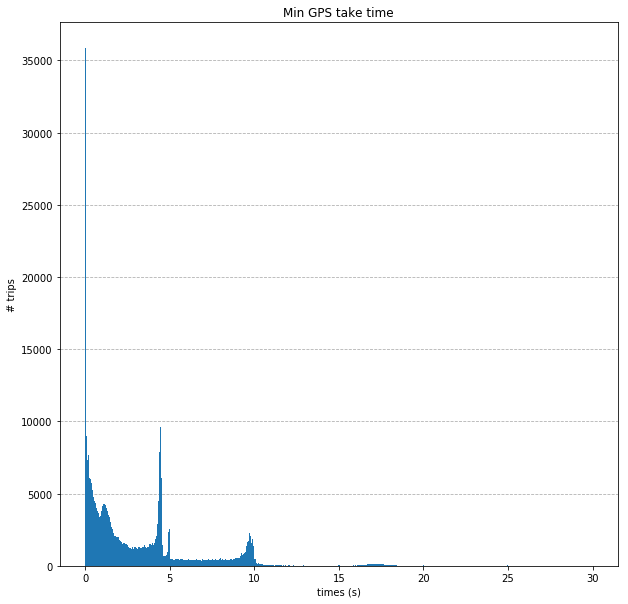

In [12]:
title = 'Min GPS take time'
print(title)
stat = trips.take_time_min
display(stat.describe())
plt.figure(figsize=(10, 10))
plots.dist_chart(stat[stat < 30], title, 'times (s)')
plt.show()

* Why so many very small values?
* Considering between 20s and 6 minutes as the atypical
* Considering above 6 minutes as the extreme

### The strange smallest values

In [13]:
zeros = trips[trips.take_time_min == 0]
len(zeros)

0

33819 trips


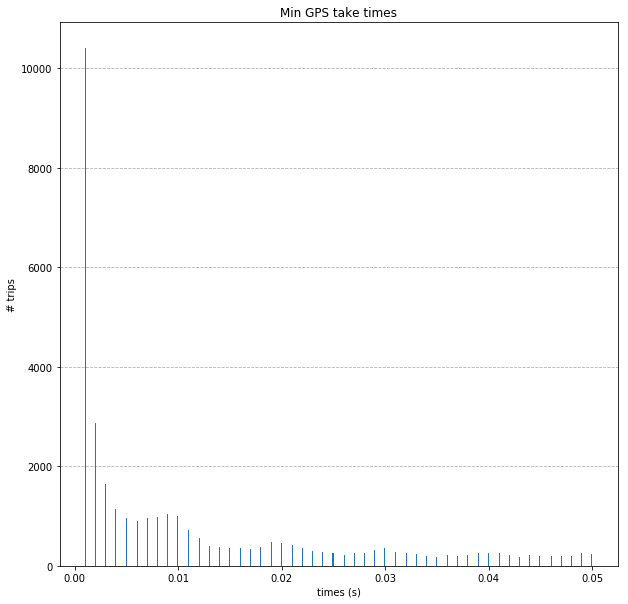

In [14]:
very_small = trips[trips.take_time_min < .05]
print(len(very_small), 'trips')
plt.figure(figsize=(10, 10))
plots.dist_chart(very_small.take_time_min, 'Min GPS take times', 'times (s)')
plt.show()

Where do they occur?

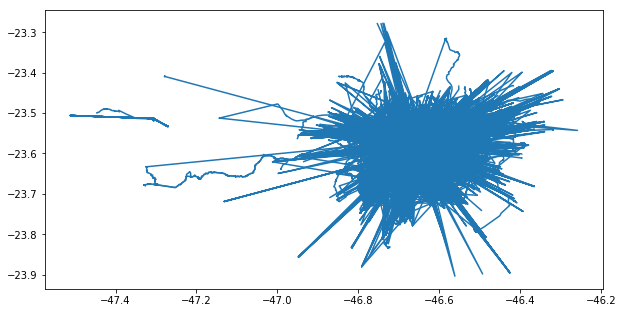

In [15]:
trajectories = traj.process_trajectories(very_small)
fig, ax = plt.subplots(figsize=(10, 10))
trajectories.plot(ax=ax)
plt.show()

* Wow, they occupy the entire São paulo Metropolitan area and are so long!

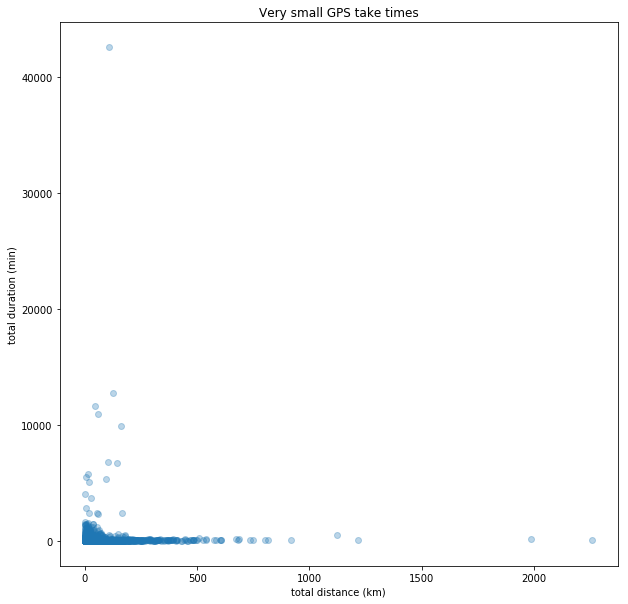

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Very small GPS take times')
plt.xlabel('total distance (km)')
plt.ylabel('total duration (min)')
plt.scatter(very_small.total_distance/1000, very_small.total_duration/60, alpha=0.3)
plt.show()

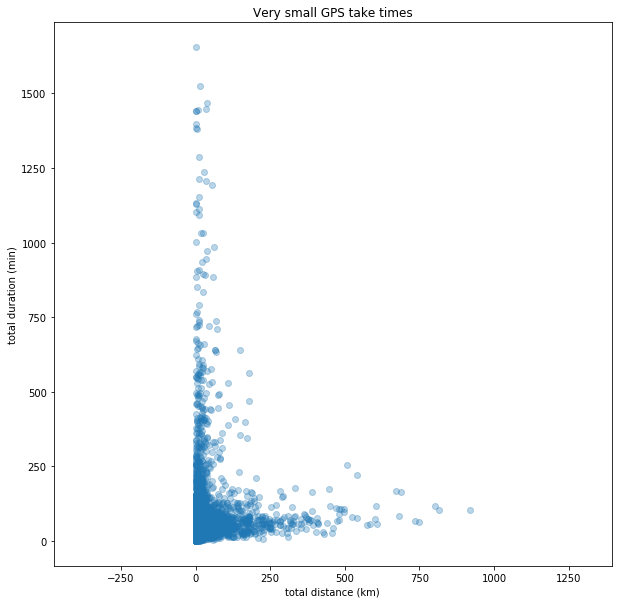

In [17]:
selected = very_small[(very_small.total_distance < 1000*1000) & (very_small.total_duration < 2000*60)]
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Very small GPS take times')
plt.xlabel('total distance (km)')
plt.ylabel('total duration (min)')
plt.scatter(selected.total_distance/1000, selected.total_duration/60, alpha=0.3)
plt.show()

* Most of them are trips that didn't happen

When do they occur?

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


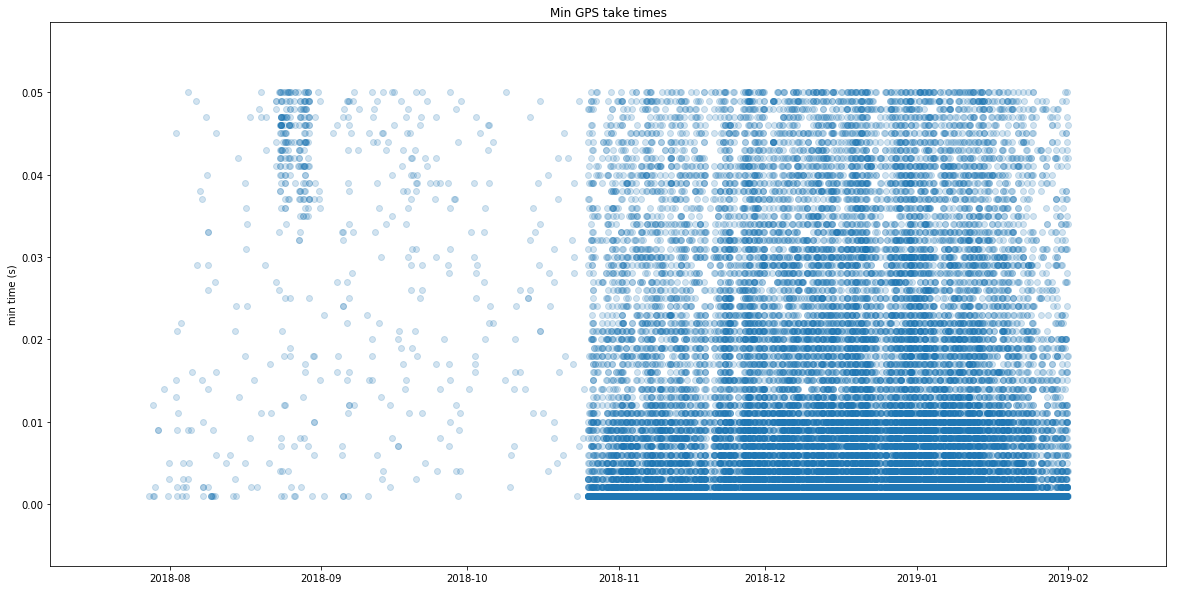

In [18]:
very_small['start_time'] = yt.extract_start_times(very_small)
plt.figure(figsize=(20, 10))
plots.time_scatter(very_small.take_time_min, 'Min GPS take times', 'min time (s)', very_small.start_time)
plt.show()

### Some atypical values
* From 20s to 6 minutes between takes

In [19]:
atypical = trips[(trips.take_time_min >= 20) & (trips.take_time_min < 6*60)]
print(len(atypical), 'trips')

4156 trips


Where do they occur?
* Here we can use Folium :)

In [20]:
trajectories = traj.process_trajectories(atypical)
fmap = traj.create_map([-23.6, -46.7], zoom=11)
folium.GeoJson(trajectories.to_json()).add_to(fmap)
fmap

When do they occur?

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


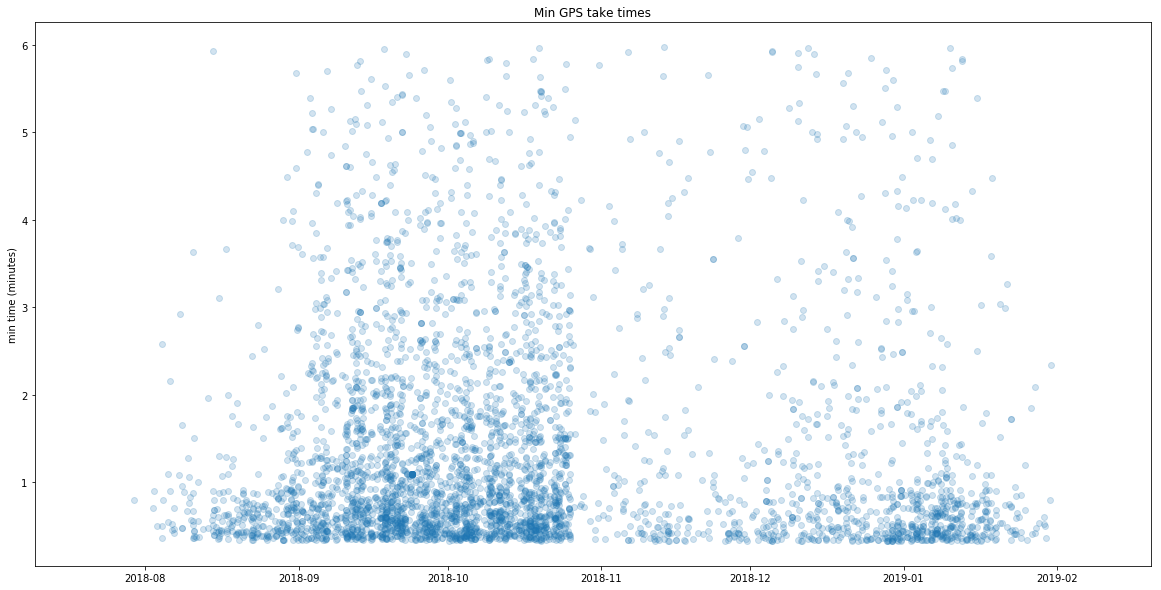

In [21]:
atypical['start_time'] = yt.extract_start_times(atypical)
plt.figure(figsize=(20, 10))
plots.time_scatter(atypical.take_time_min/60, 'Min GPS take times', 'min time (minutes)', atypical.start_time)
plt.show()

Number of GPS lectures
* if we have stats values, at least 2 takes were... taken :)

In [22]:
atypical.num_takes.value_counts()

2.0     4001
3.0      107
4.0       20
5.0       13
7.0        5
9.0        3
6.0        2
8.0        2
16.0       1
11.0       1
10.0       1
Name: num_takes, dtype: int64

Distances and durations

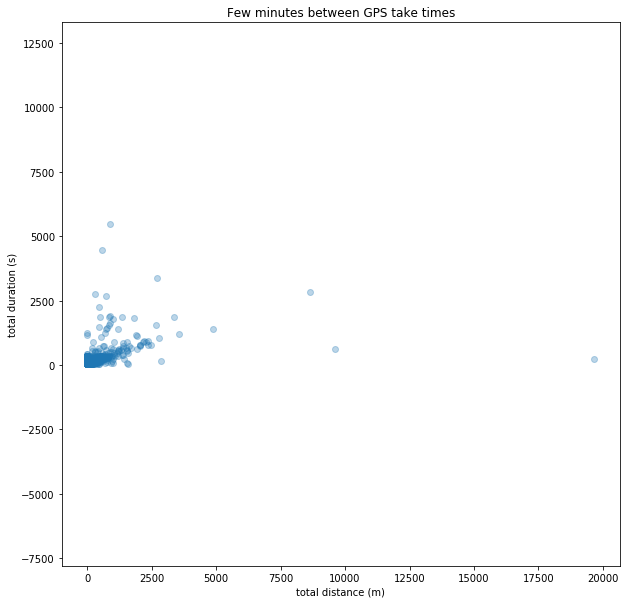

In [23]:
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Few minutes between GPS take times')
plt.xlabel('total distance (m)')
plt.ylabel('total duration (s)')
plt.scatter(atypical.total_distance, atypical.total_duration, alpha=0.3)
plt.show()

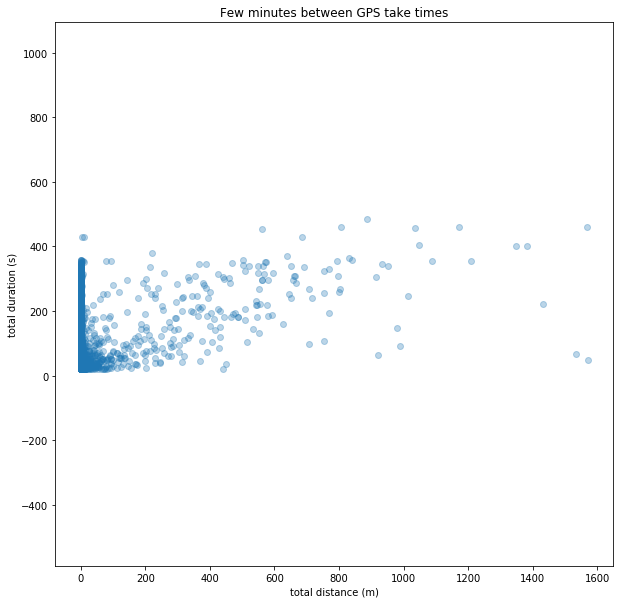

In [24]:
selected = atypical[(atypical.total_distance < 2500) & (atypical.total_duration < 500)]
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Few minutes between GPS take times')
plt.xlabel('total distance (m)')
plt.ylabel('total duration (s)')
plt.scatter(selected.total_distance, selected.total_duration, alpha=0.3)
plt.show()

### The extreme values

* Above 6 minutes

In [25]:
extreme = trips[trips.take_time_min >= 6*60]
print(len(extreme), 'trips')
trajectories = traj.process_trajectories(extreme)
fmap = traj.create_map([-23.6, -46.7], zoom=11)
folium.GeoJson(trajectories.to_json()).add_to(fmap)
fmap

744 trips


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


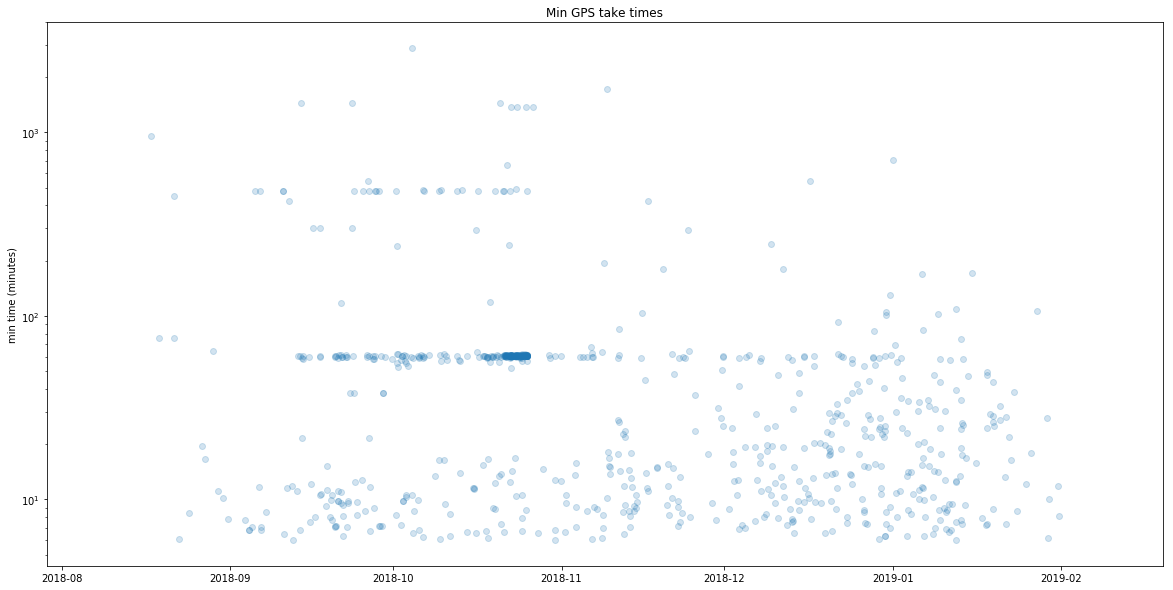

In [26]:
extreme['start_time'] = yt.extract_start_times(extreme)
plt.figure(figsize=(20, 10))
plt.yscale('log')
plots.time_scatter(extreme.take_time_min/60, 'Min GPS take times', 'min time (minutes)', extreme.start_time)
plt.show()

In [27]:
extreme.num_takes.value_counts()

2.0    738
3.0      6
Name: num_takes, dtype: int64

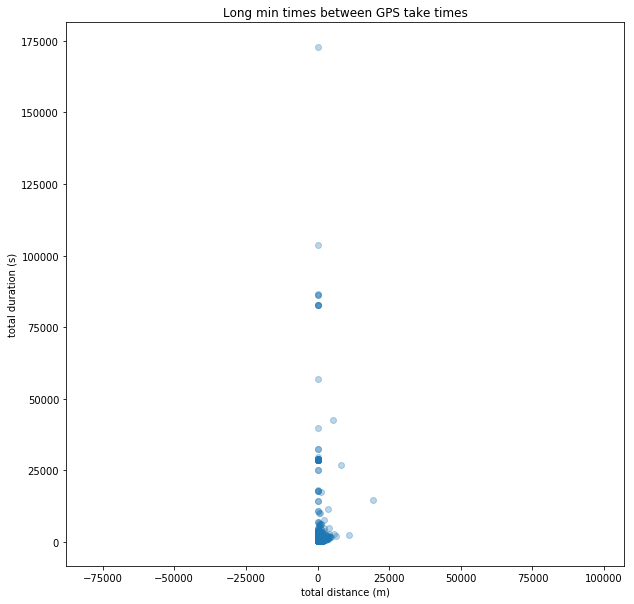

In [28]:
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Long min times between GPS take times')
plt.xlabel('total distance (m)')
plt.ylabel('total duration (s)')
plt.scatter(extreme.total_distance, extreme.total_duration, alpha=0.3)
plt.show()

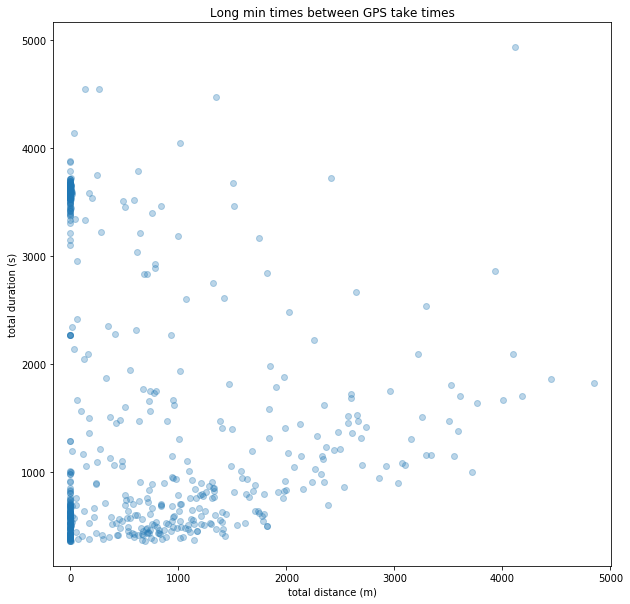

In [29]:
selected = extreme[(extreme.total_duration < 5000) & (extreme.total_distance < 5000)]
plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.title('Long min times between GPS take times')
plt.xlabel('total distance (m)')
plt.ylabel('total duration (s)')
plt.scatter(selected.total_distance, selected.total_duration, alpha=0.3)
plt.show()

### Some 1-hour min times!

In [30]:
selected = trips[(trips.take_time_min > 55*60) & (trips.take_time_min < 65*60)]
plt.figure(figsize=(10, 10))
plots.dist_chart(selected.take_time_min/60, 'Min GPS take time', 'minutes')
plt.show()

In [31]:
one_hour = trips[(trips.take_time_min >= 58*60) & (trips.take_time_min < 62*60)]
print(len(one_hour), 'trips')
trajectories = traj.process_trajectories(one_hour)
fmap = traj.create_map([-23.6, -46.7], zoom=11)
folium.GeoJson(trajectories.to_json()).add_to(fmap)
fmap

228 trips


In [32]:
one_hour['start_time'] = yt.extract_start_times(one_hour)
plt.figure(figsize=(20, 10))
plt.yscale('log')
plots.time_scatter(one_hour.take_time_min, 'Min GPS take times', 'min time (s)', one_hour.start_time)
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
